In [1]:
import networkx as nx
import triad_utils
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import methods
import random as rn

In [45]:
raw_data = "comm-f2f-Resistance/network/network60.csv"
with open(raw_data, 'r') as file:
    lines = file.readlines()
l = []
for line in lines:
    if "TIME" in line:
        continue
    line = line[line.index(".0,")+3:]
    n1 = [int(x) for x in line.strip().split(",")]
    l.append(n1)

In [75]:
def convert_to_matrix(m):
    padded_data = m + [0]*8
    reshaped_data = np.array(padded_data).reshape(8,8)
    G = nx.from_numpy_array(reshaped_data,create_using=nx.DiGraph)
    G.edges(data=True)
    #print(G)
    return G

In [76]:
def convert_to_regular_triads(networkx_triads):
    census = []
    census.append(networkx_triads['021D'])
    census.append(networkx_triads['021U'])
    census.append(networkx_triads['021C'])
    census.append(networkx_triads['111D'])
    census.append(networkx_triads['111U'])
    census.append(networkx_triads['201'])
    census.append(networkx_triads['030T'])
    census.append(networkx_triads['030C'])
    census.append(networkx_triads['120D'])
    census.append(networkx_triads['120U'])
    census.append(networkx_triads['120C'])
    census.append(networkx_triads['210'])
    census.append(networkx_triads['300'])
    return census

In [77]:
def create_profile(list_of_matrices):
    for m in list_of_matrices:
        G = convert_to_matrix(m)
        census = convert_to_regular_triads(nx.triadic_census(G))
        #print(census)
        significance_profile = triad_utils.triad_significance_profile(census,nx.adjacency_matrix(G).toarray(), 100,400)
        profile_plot = plt.plot(significance_profile, "o-")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.xticks(range(0,13),range(1,14))

6729


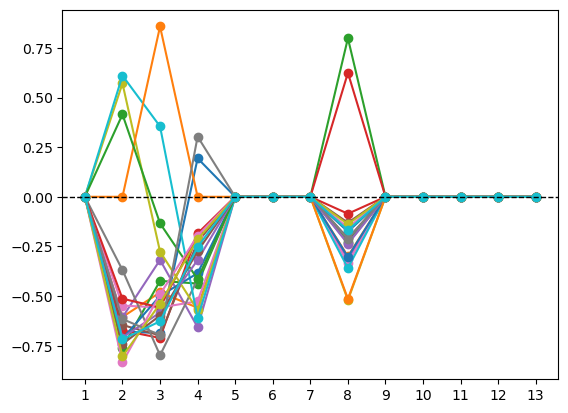

In [80]:
print(len(l))
create_profile(l[:20])

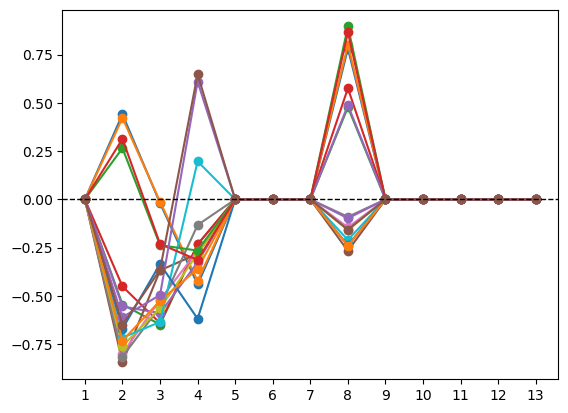

In [79]:
create_profile(l[6713:])

/Users/sofievargas/Documents/GitHub/barrett-fellows-testing/triad_utils.py:166: RuntimeWarning: divide by zero encountered in scalar divide
  profile.append(  (p[i]-m[i])/s[i]  )
/Users/sofievargas/Documents/GitHub/barrett-fellows-testing/triad_utils.py:170: RuntimeWarning: invalid value encountered in scalar divide
  normalized_profile = [x / norm for x in profile]


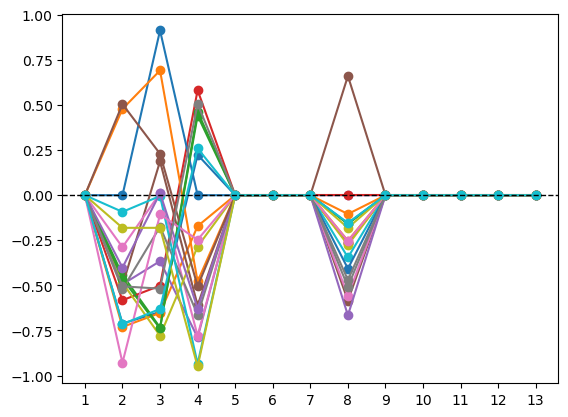

In [84]:
create_profile(l[0:6729:340])